In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [138]:
file_path = "../data/Online Retail.xlsx"
data = pd.read_excel(file_path)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Exploratory Data Analysis

In [139]:
# Dimension of dataset
data.shape 

(541909, 8)

In [140]:
# Summary Statistics
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [141]:
# Basic dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Duplicates

In [142]:
data.duplicated().sum()

np.int64(5268)

In [143]:
data[data.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [144]:
row = data.loc[541701]
print(row)
data[data.eq(row).all(axis=1)]

InvoiceNo                            581538
StockCode                             23343
Description    JUMBO BAG VINTAGE CHRISTMAS 
Quantity                                  1
InvoiceDate             2011-12-09 11:34:00
UnitPrice                              2.08
CustomerID                          14446.0
Country                      United Kingdom
Name: 541701, dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541666,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446.0,United Kingdom
541701,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446.0,United Kingdom


In [145]:
data[data.duplicated(keep=False)].sort_values(
    by=["InvoiceNo", "StockCode", "InvoiceDate"]
)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04 13:25:00,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,2011-12-06 10:38:00,2.95,14562.0,United Kingdom


## Missing Values 

In [146]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [147]:
data[data['Description'].isna()== True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [148]:
sum_country = data.Country.value_counts()
sum_country

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


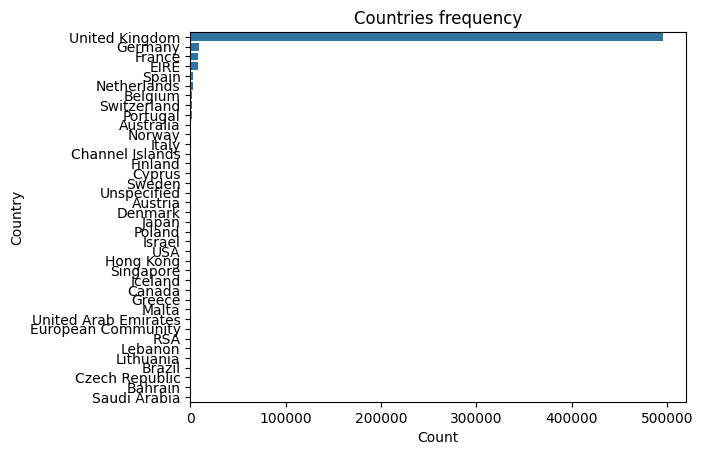

In [149]:
sns.barplot(x=sum_country.values, y=sum_country.index)
plt.title("Countries frequency" )
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

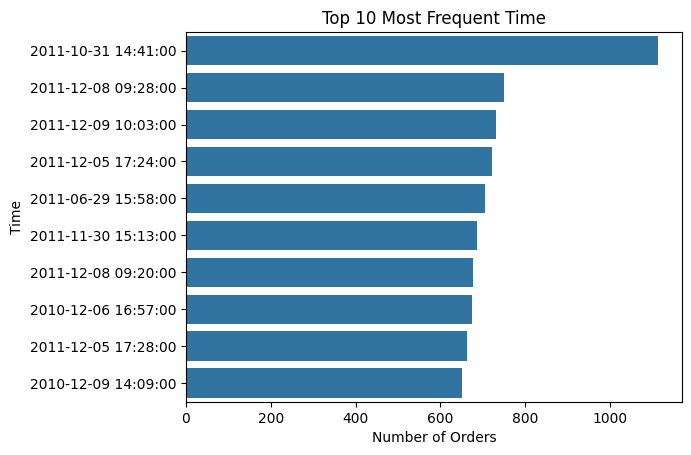

In [150]:
# Qs. 
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#data['InvoiceDate']

ten_freq_time = data['InvoiceDate'].value_counts().head(10)

sns.barplot(x=ten_freq_time.values, y=ten_freq_time.index)
plt.title("Top 10 Most Frequent Time")
plt.xlabel("Number of Orders")
plt.ylabel("Time")
plt.show()

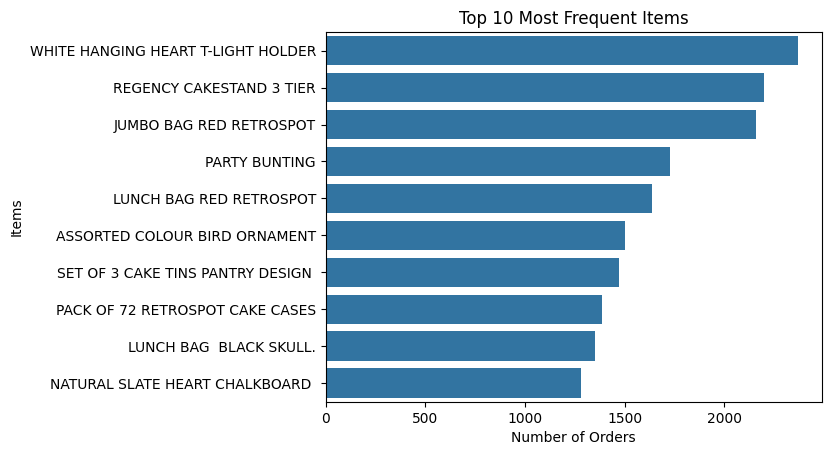

In [151]:
desc_count = data['Description'].value_counts().head(10)

sns.barplot(x=desc_count.values, y=desc_count.index)
plt.title("Top 10 Most Frequent Items")
plt.xlabel("Number of Orders")
plt.ylabel("Items")
plt.show()

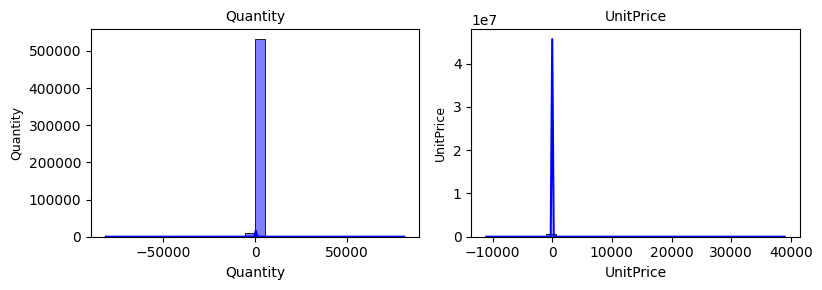

In [152]:
num_col = data.select_dtypes(include="number").columns #column index
num_col = num_col.drop('CustomerID')
num_features = len(num_col) 

num_cols = 3 
num_rows = int(np.ceil(num_features / num_cols)) 

plt.figure(figsize=(num_cols * 4, num_rows * 3))

for i, feature in enumerate(num_col):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.histplot(data=data, x=data[feature], bins=30, kde=True, color='blue') 
    plt.title(f'{feature}', fontsize=10)
    plt.ylabel(feature, fontsize=9)

plt.tight_layout() 
plt.show() 

In [153]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [154]:
data.sort_values('UnitPrice', ascending=False).head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom


In [155]:
data[data['UnitPrice']<0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [156]:
# Unique CustomerID
data['CustomerID'].nunique()


4372

# Data Cleaning

In [157]:
# Remove duplicates
data = data.drop_duplicates()
data.shape

(536641, 8)

In [158]:
# Remove missing customerID
data = data.dropna(subset=['CustomerID'])
data.shape

(401604, 8)

In [159]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [160]:
# Drop negative quantity & negative price
data = data[(data['Quantity']>0) & (data['UnitPrice']>0)]
data.shape

(392692, 8)

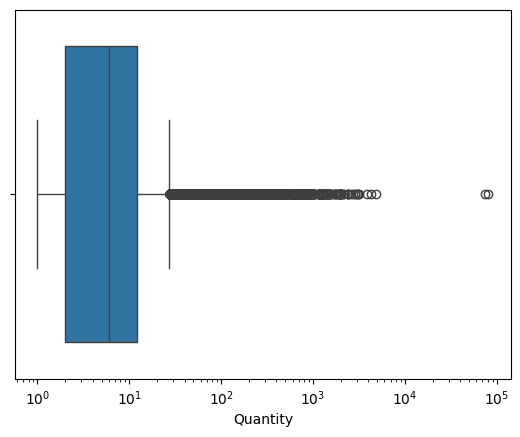

In [161]:
sns.boxplot(x=data['Quantity']) 
plt.xscale('log')
plt.show()

In [162]:
data['Quantity'].describe()
# print(data.shape)

count    392692.000000
mean         13.119702
std         180.492832
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [163]:
# Check outliers for quantity and price
q1 = data['Quantity'].quantile(0.25)
q3 = data['Quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

#data[(data['Quantity']<lower_bound)]
print(len(data[(data['Quantity']<lower_bound)]))
print(len(data[(data['Quantity']>upper_bound)]))
data[(data['Quantity']>upper_bound)]

0
25616


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
44,536370,22492,MINI PAINT SET VINTAGE,36,2010-12-01 08:45:00,0.65,12583.0,France
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom
...,...,...,...,...,...,...,...,...
541835,581579,23581,JUMBO BAG PAISLEY PARK,40,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom


In [164]:
# Check outliers for quantity and price
q1 = data['UnitPrice'].quantile(0.25)
q3 = data['UnitPrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

#data[(data['UnitPrice']<lower_bound)]
print(len(data[(data['UnitPrice']<lower_bound)]))
print(len(data[(data['UnitPrice']>upper_bound)]))
data[(data['UnitPrice']>upper_bound)]

0
34112


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047.0,United Kingdom
19,536367,21777,RECIPE BOX WITH METAL HEART,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom
20,536367,48187,DOORMAT NEW ENGLAND,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,2011-12-09 12:16:00,11.95,12713.0,Germany
541831,581579,22941,CHRISTMAS LIGHTS 10 REINDEER,4,2011-12-09 12:19:00,8.50,17581.0,United Kingdom
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,2011-12-09 12:20:00,9.95,12748.0,United Kingdom


In [165]:
data['UnitPrice'].describe()

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [166]:
len(data[data['UnitPrice'] <= 0])


0

In [167]:
# Segment bulk buyers 
#bulk_cutoff = data['Quantity'].quantile(0.99)
#bulk_cutoff

In [168]:
# Split into 2 segments
#normal_data =  data[data['Quantity'] <= bulk_cutoff]
#bulk_data =  data[data['Quantity'] > bulk_cutoff]

In [169]:
# Normal customers (<= 99%)

# Feature Engineering


In [170]:
data.shape
data['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.], shape=(4338,))

In [171]:
# RFM 
# Total price = quantity * price
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

ref_data = data['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    "InvoiceDate": lambda x: (ref_data - x.max()).days,
    "InvoiceNo" : "nunique",
    "TotalPrice" : "sum"
}).reset_index()

rfm.columns = ["CustomerID","Recency", "Frequency", "Monetary"]
print(rfm.head())
print(rfm.shape)
# 4338 data points left

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40
(4338, 4)


In [172]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2048.688081
std,1721.808492,100.014169,7.697998,8985.230220
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,306.482500
50%,15299.500000,51.000000,2.000000,668.570000
75%,16778.750000,142.000000,5.000000,1660.597500
max,18287.000000,374.000000,209.000000,280206.020000


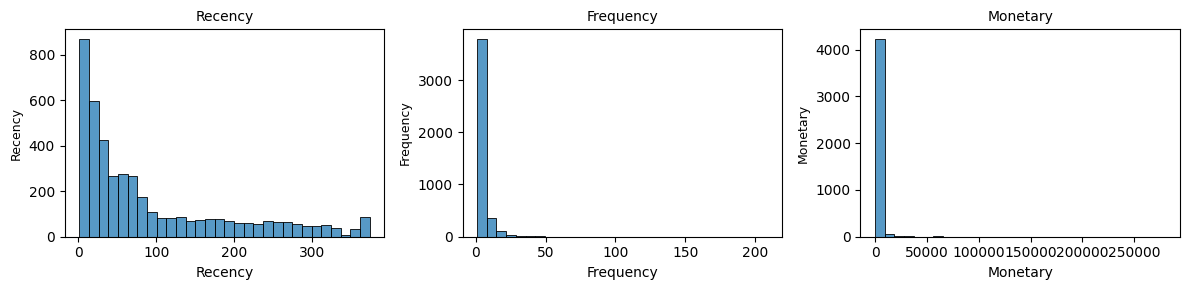

In [173]:
rfm_col = rfm.columns.drop("CustomerID")
rfm_features = len(rfm_col) 

num_cols = 3 
num_rows = int(np.ceil(rfm_features / num_cols)) 

plt.figure(figsize=(num_cols * 4, num_rows * 3))

for i, feature in enumerate(rfm_col):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.histplot(data=rfm, x=rfm[feature], bins=30) 
    plt.title(f'{feature}', fontsize=10)
    plt.ylabel(feature, fontsize=9)

plt.tight_layout() 
plt.show() 

In [174]:
rfm["Frequency"].value_counts().head(10)
rfm["Frequency"].value_counts().tail(10)


Frequency
201    1
73     1
63     1
91     1
29     1
51     1
46     1
124    1
45     1
60     1
Name: count, dtype: int64

# Modeling

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [188]:
# K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [179]:
rfm["Cluster"].value_counts().sort_index()

Cluster
0    1674
1    1684
2     954
3      26
Name: count, dtype: int64

In [ ]:
#Cluster centroids
rfm.groupby('Cluster').mean().round(2)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    rfm["Recency"],
    rfm["Monetary"],
    c= rfm["Cluster"],
    cmap="tab10",
    alpha = 0.4
)
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.title("Customer Segments using K-Means")
plt.show()

In [ ]:
cluster_stats = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()

plt.figure(figsize=(8,5))
sns.heatmap(cluster_stats, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Cluster Profiles (Average RFM Values)")
plt.show()

# Elbow method 

In [176]:
wcss = []
for i in range (2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

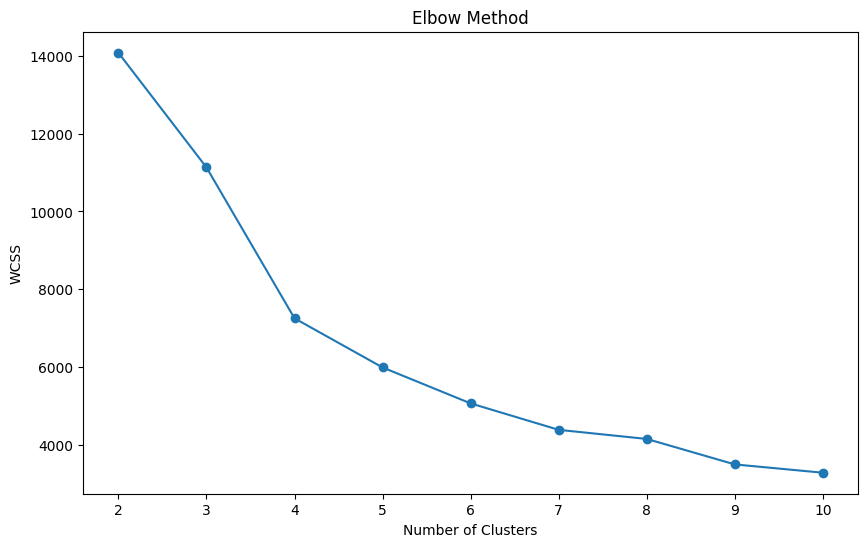

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# optimal k is 4

# Evaluation

In [189]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(rfm_scaled,rfm['Cluster'])
print(f"Silhouette Score: {kmeans_silhouette}")

Silhouette Score: 0.5453681644590144
